In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Análise dos dados de etnia usando o modelo ANOVA

In [13]:
DATA_PATH = '../dados/processados/etnias_por_estado.csv'
df = pd.read_csv(DATA_PATH, index_col=0)
df = df.reset_index(drop=True)
df

,SG_UF_NOT,CS_RACA,CASOS,TAXA
0,TO,parda,290,28.673211
1,TO,amarela,5,15.721293
2,TO,branca,43,11.036678
3,TO,preta,6,4.146166
4,SP,preta,2318,92.733984
...,...,...,...,...
122,AL,branca,60,5.774906
123,AC,amarela,10,55.900274
124,AC,parda,92,15.374332
125,AC,branca,13,6.237675


In [14]:
df_taxa = pd.pivot_table(df, values='TAXA', index=['SG_UF_NOT'],
                    columns=['CS_RACA'], aggfunc=np.sum, fill_value=0)
df_taxa

CS_RACA,amarela,branca,indigena,parda,preta
SG_UF_NOT,,,,,
AC,55.900274,6.237675,0.000000,15.374332,3.922799
AL,62.388108,5.774906,14.918693,35.971258,7.233240
AM,97.705247,41.926606,65.356241,145.350740,50.430105
AP,21.099272,10.726423,31.648908,17.308861,11.051556
BA,25.116232,5.632107,6.697699,14.059414,8.509944
CE,21.769695,16.499467,32.654838,67.737503,20.586551
DF,38.508193,10.336306,10.911075,20.002667,12.489718
ES,90.223097,15.663675,16.404199,16.774514,21.937886
GO,9.096171,3.837005,28.117531,8.691739,4.974264


Ajustando o dataframe para aplicar o modelo

In [15]:
etnias = ['amarela', 'branca', 'parda', 'preta', 'indigena']
#etnias = ['branca', 'parda', 'preta']
df_melt = pd.melt(df_taxa.reset_index(), id_vars=['SG_UF_NOT'], value_vars=etnias)
df_melt

,SG_UF_NOT,CS_RACA,value
0,AC,amarela,55.900274
1,AL,amarela,62.388108
2,AM,amarela,97.705247
3,AP,amarela,21.099272
4,BA,amarela,25.116232
...,...,...,...
130,RS,indigena,14.590872
131,SC,indigena,32.173553
132,SE,indigena,0.000000
133,SP,indigena,84.253278


In [23]:
df_melt.groupby('CS_RACA').describe()

value                                                        \
         count       mean        std       min        25%        50%   
CS_RACA                                                                
amarela   27.0  38.495722  28.756017  0.000000  16.615170  31.925237   
branca    27.0  19.065514  16.709943  3.498945  10.187422  13.854082   
indigena  27.0  24.019802  25.439004  0.000000   5.519648  16.404199   
parda     27.0  32.829546  30.868879  4.924410  11.578095  20.002667   
preta     27.0  21.180054  20.636813  3.922799   8.613537  14.147658   

                                 
                75%         max  
CS_RACA                          
amarela   55.783139   97.705247  
branca    18.231001   62.947867  
indigena  31.911231   94.354820  
parda     39.567807  145.350740  
preta     22.748693   92.733984

Implementação do ANOVA utilizada:  
https://reneshbedre.github.io/blog/anova.html

Abaixo o valor de P rejeita a hipótese nula, então há diferenças significativas entre as taxas de cada etnia

In [16]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(CS_RACA)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(CS_RACA),4.0,7337.921661,1834.480415,2.928572,0.023376
Residual,130.0,81433.024230,626.407879,NaN,NaN


In [17]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(CS_RACA)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(CS_RACA),7337.921661,4.0,2.928572,0.023376
Residual,81433.024230,130.0,NaN,NaN


In [18]:
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='CS_RACA', anova_model='value ~ C(CS_RACA)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,amarela,branca,19.430208,0.585263,38.275152,4.033952,0.039789
1,amarela,parda,5.666175,-13.178769,24.511120,1.176368,0.900000
2,amarela,preta,17.315668,-1.529277,36.160612,3.594947,0.087588
3,amarela,indigena,14.475920,-4.369025,33.320865,3.005380,0.215818
4,branca,parda,13.764032,-5.080912,32.608977,2.857584,0.262038
5,branca,preta,2.114540,-16.730405,20.959485,0.439005,0.900000
6,branca,indigena,4.954288,-13.890657,23.799232,1.028572,0.900000
7,parda,preta,11.649492,-7.195453,30.494437,2.418579,0.432983
8,parda,indigena,8.809745,-10.035200,27.654689,1.829012,0.672286
9,preta,indigena,2.839748,-16.005197,21.684692,0.589567,0.900000


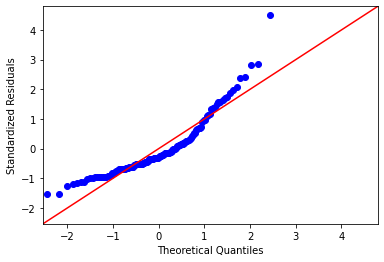

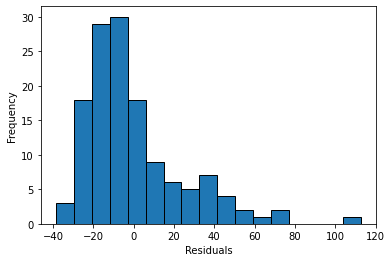

In [19]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [20]:
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.8773276209831238 3.508647372640894e-09


In [21]:
import scipy.stats as stats
w, pvalue = stats.bartlett(df_taxa['amarela'], df_taxa['branca'], df_taxa['parda'], df_taxa['preta'], df_taxa['indigena'])
print(w, pvalue)

11.883500724297855 0.018238940076514987


In [22]:
from bioinfokit.analys import stat 
res = stat()
res.levene(df=df_melt, res_var='value', xfac_var='CS_RACA')
res.levene_summary

,Parameter,Value
0,Test statistics (W),2.2275
1,Degrees of freedom (Df),4.0000
2,p value,0.0695
